# Reading Regression Timing Data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
df = pd.read_csv('regression_timings master list.csv')
df

,Test Name,MyISAM Total Time,MyISAM Start Transfer Time,Unnamed: 3,InnoDB Total Time,InnoDB Start Transfer Time
0,Cloud/configuration/cloud_avg_cores_reserved/a...,0.059955,0.059950,NaN,0.056255,0.056252
1,Cloud/configuration/cloud_avg_cores_reserved/a...,0.065416,0.065412,NaN,0.061219,0.061216
2,Cloud/configuration/cloud_avg_cores_reserved/a...,0.072476,0.072471,NaN,0.065990,0.065987
3,Cloud/configuration/cloud_avg_cores_reserved/a...,0.063708,0.063705,NaN,0.056681,0.056678
4,Cloud/configuration/cloud_avg_cores_reserved/a...,0.064494,0.064490,NaN,0.062833,0.062812
...,...,...,...,...,...,...
24395,Storage/username/user_count/timeseries-Year-cd,0.496918,0.492954,NaN,0.244348,0.240255
24396,Storage/username/user_count/timeseries-Year-cs,0.495570,0.490856,NaN,0.261630,0.256816
24397,Storage/username/user_count/timeseries-Year-pi,0.068550,0.068547,NaN,0.062513,0.062508
24398,Storage/username/user_count/timeseries-Year-pu...,0.045511,0.045504,NaN,0.048143,0.048140


# Charting Total and Transfer Times

MyISAM Total Time             8013.868693
MyISAM Start Transfer Time    8004.468570
InnoDB Total Time             4517.444272
InnoDB Start Transfer Time    4508.897521
dtype: float64


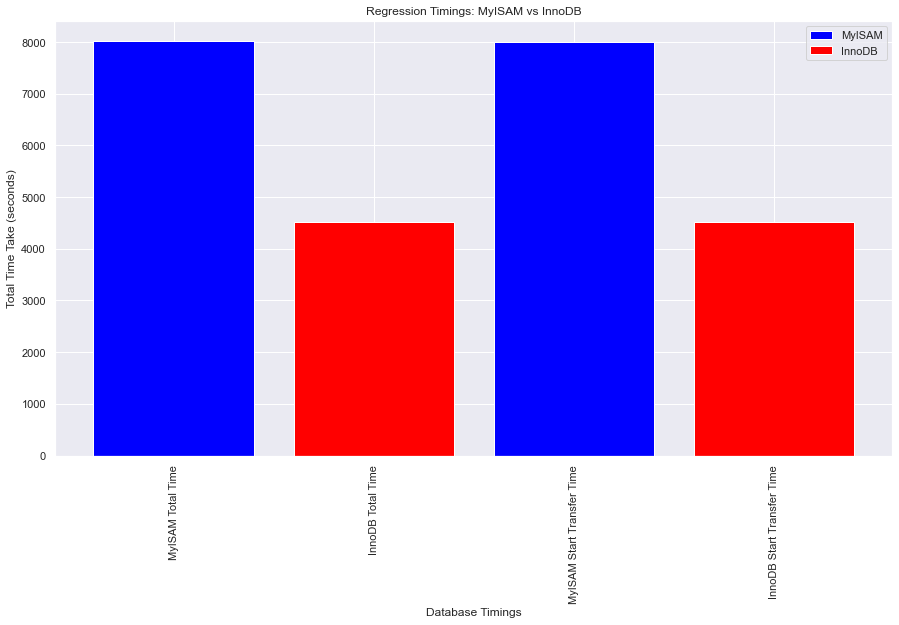

In [12]:
#df.sum() #sums all cols by default
cols_to_sum = ['MyISAM Total Time','MyISAM Start Transfer Time','InnoDB Total Time','InnoDB Start Transfer Time']
total_time = df[cols_to_sum].sum()
print(total_time)
plt.title("Regression Timings: MyISAM vs InnoDB")
#plt.bar(cols_to_sum, total_time)
plt.bar(cols_to_sum[0], total_time[0], color='blue', label='MyISAM')
plt.bar(cols_to_sum[2], total_time[2], color='red', label='InnoDB')
plt.bar(cols_to_sum[1], total_time[1], color='blue')
plt.bar(cols_to_sum[3], total_time[3], color='red')
plt.xticks(rotation=90) #rotate lables vertically
plt.xlabel('Database Timings')
plt.ylabel('Total Time Take (seconds)')
plt.legend()
plt.show()

# Modifying Dataframe

## Deleting & Inserting Additional Columns

In [13]:
del df['Unnamed: 3'] #Get rid of blank column, no need to rerun this whole block (errors)
test = df['Test Name'].str.split('/', expand=True)
l = test[3].str.split('-', expand=True)

df.insert(1, 'Realm', test[0])
df.insert(2, 'Group By', test[1])
df.insert(3, 'Statistic', test[2])
df.insert(4, 'Data Set Type', l[0])
df.insert(5, 'Aggregation Unit', l[1])
df

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time
0,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.059955,0.059950,0.056255,0.056252
1,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.065416,0.065412,0.061219,0.061216
2,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.072476,0.072471,0.065990,0.065987
3,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.063708,0.063705,0.056681,0.056678
4,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.064494,0.064490,0.062833,0.062812
...,...,...,...,...,...,...,...,...,...,...
24395,Storage/username/user_count/timeseries-Year-cd,Storage,username,user_count,timeseries,Year,0.496918,0.492954,0.244348,0.240255
24396,Storage/username/user_count/timeseries-Year-cs,Storage,username,user_count,timeseries,Year,0.495570,0.490856,0.261630,0.256816
24397,Storage/username/user_count/timeseries-Year-pi,Storage,username,user_count,timeseries,Year,0.068550,0.068547,0.062513,0.062508
24398,Storage/username/user_count/timeseries-Year-pu...,Storage,username,user_count,timeseries,Year,0.045511,0.045504,0.048143,0.048140


# Further Analysis

## Calculating Percentages Into A New Dataframe

In [14]:
percent_change = (100 * (df['InnoDB Total Time'] - df['MyISAM Total Time']) / df['MyISAM Total Time'].abs())
df.insert(10, 'Percent Change', percent_change)
df

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time,Percent Change
0,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.059955,0.059950,0.056255,0.056252,-6.171295
1,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.065416,0.065412,0.061219,0.061216,-6.415862
2,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.072476,0.072471,0.065990,0.065987,-8.949169
3,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.063708,0.063705,0.056681,0.056678,-11.030012
4,Cloud/configuration/cloud_avg_cores_reserved/a...,Cloud,configuration,cloud_avg_cores_reserved,aggregate,Day,0.064494,0.064490,0.062833,0.062812,-2.575433
...,...,...,...,...,...,...,...,...,...,...,...
24395,Storage/username/user_count/timeseries-Year-cd,Storage,username,user_count,timeseries,Year,0.496918,0.492954,0.244348,0.240255,-50.827299
24396,Storage/username/user_count/timeseries-Year-cs,Storage,username,user_count,timeseries,Year,0.495570,0.490856,0.261630,0.256816,-47.206247
24397,Storage/username/user_count/timeseries-Year-pi,Storage,username,user_count,timeseries,Year,0.068550,0.068547,0.062513,0.062508,-8.806710
24398,Storage/username/user_count/timeseries-Year-pu...,Storage,username,user_count,timeseries,Year,0.045511,0.045504,0.048143,0.048140,5.783217


## Scatter Plotting

<AxesSubplot:ylabel='Percent Change'>

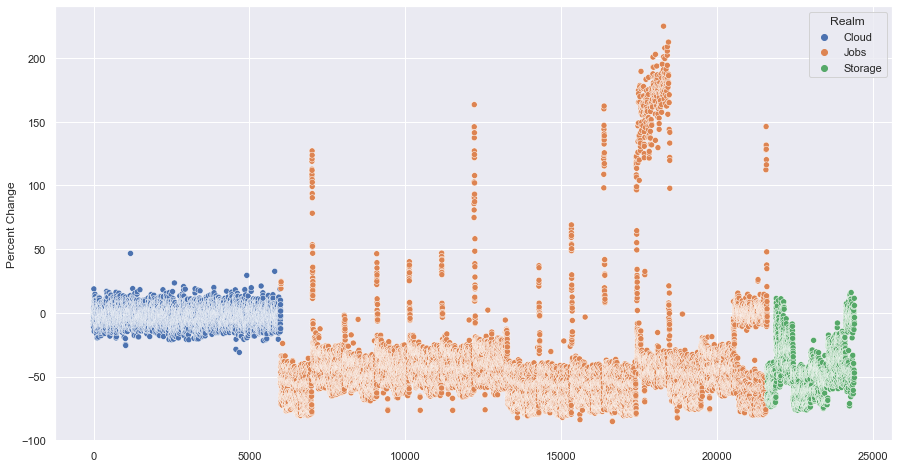

In [15]:
sns.scatterplot(x=df.index, y=df['Percent Change'], hue=df['Realm'])

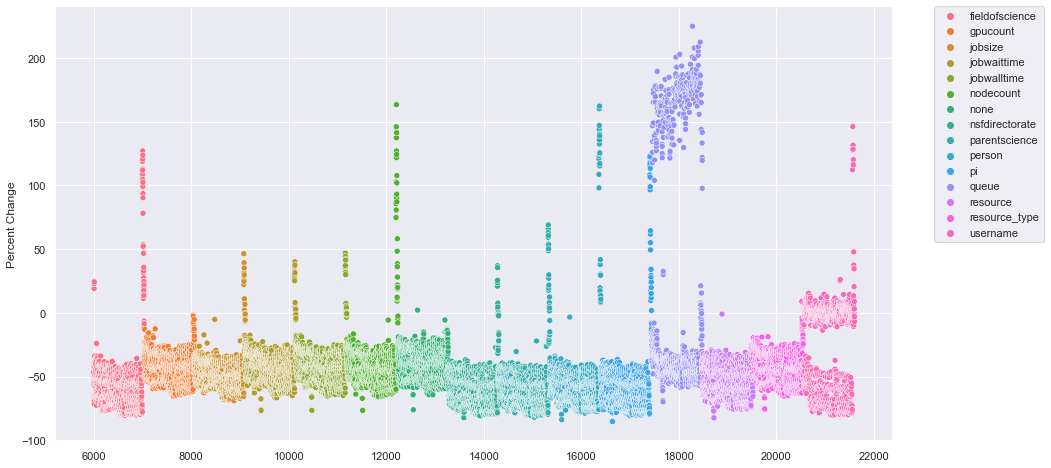

In [30]:
jobs_df = df.loc[df['Realm'] == 'Jobs']
sns.scatterplot(x=jobs_df.index, y=jobs_df['Percent Change'], hue=jobs_df['Group By'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## Identifying Top Values for Percent Change

In [25]:
jobs_df.sort_values(by=['Percent Change'], ascending=False).head(5)

,Test Name,Realm,Group By,Statistic,Data Set Type,Aggregation Unit,MyISAM Total Time,MyISAM Start Transfer Time,InnoDB Total Time,InnoDB Start Transfer Time,Percent Change
18277,Jobs/queue/total_cpu_hours/timeseries-Year-pi,Jobs,queue,total_cpu_hours,timeseries,Year,1.371040,1.371035,4.456244,4.456233,225.026549
18436,Jobs/queue/total_wallduration_hours/timeseries...,Jobs,queue,total_wallduration_hours,timeseries,Year,1.445229,1.445224,4.517016,4.517005,212.546731
18399,Jobs/queue/total_waitduration_hours/timeseries...,Jobs,queue,total_waitduration_hours,timeseries,Year,1.434120,1.434109,4.429914,4.429904,208.894235
18317,Jobs/queue/total_gpu_hours/timeseries-Year-pi,Jobs,queue,total_gpu_hours,timeseries,Year,1.374653,1.374650,4.232658,4.232649,207.907377
18397,Jobs/queue/total_waitduration_hours/timeseries...,Jobs,queue,total_waitduration_hours,timeseries,Year,1.374424,1.374416,4.198843,4.198817,205.498376


### Statistic Values (No Trend)

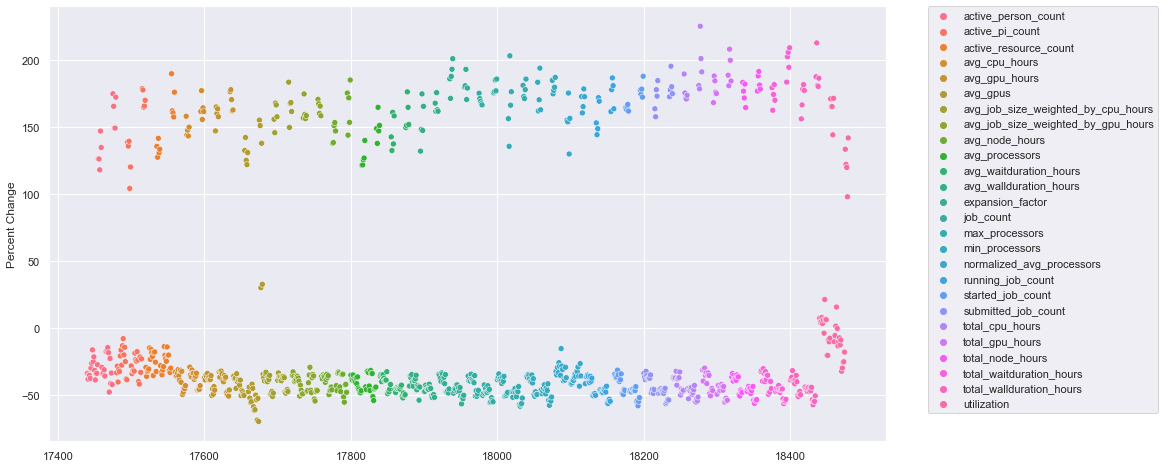

In [40]:
queue_jobs_df = jobs_df.loc[df['Group By'] == 'queue']
sns.scatterplot(x=queue_jobs_df.index, y=queue_jobs_df['Percent Change'], hue=queue_jobs_df['Statistic'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### Aggregation Unit (Trend Found, Year)

<AxesSubplot:ylabel='Percent Change'>

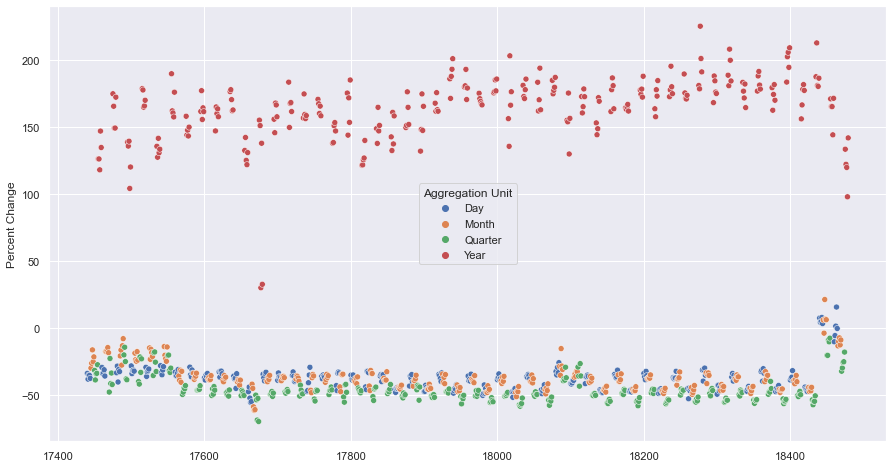

In [34]:
sns.scatterplot(x=queue_jobs_df.index, y=queue_jobs_df['Percent Change'], hue=queue_jobs_df['Aggregation Unit'])

### Testing with other Group By Values

<AxesSubplot:ylabel='Percent Change'>

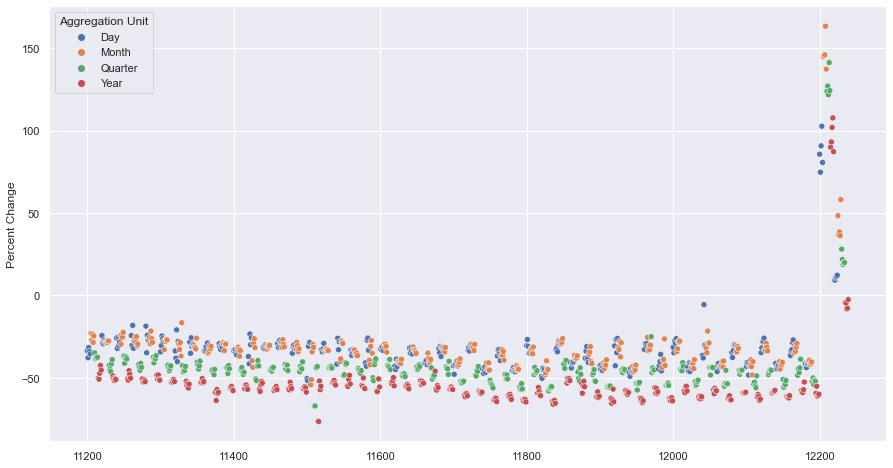

In [37]:
nodecount_jobs_df = jobs_df.loc[df['Group By'] == 'nodecount']
sns.scatterplot(x=nodecount_jobs_df.index, y=nodecount_jobs_df['Percent Change'], hue=nodecount_jobs_df['Aggregation Unit'])

## Nodecount trend found in Statistic, utilzation

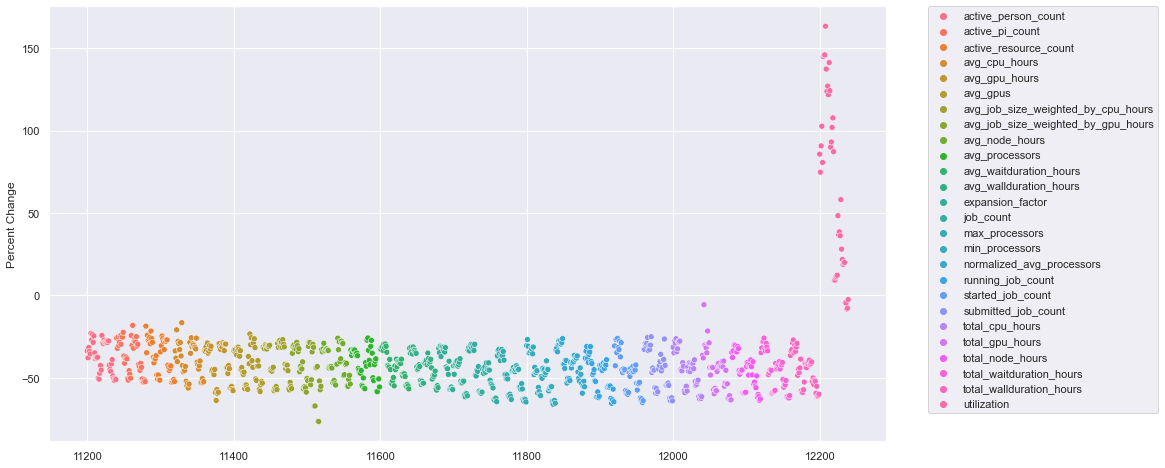

In [39]:
sns.scatterplot(x=nodecount_jobs_df.index, y=nodecount_jobs_df['Percent Change'], hue=nodecount_jobs_df['Statistic'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

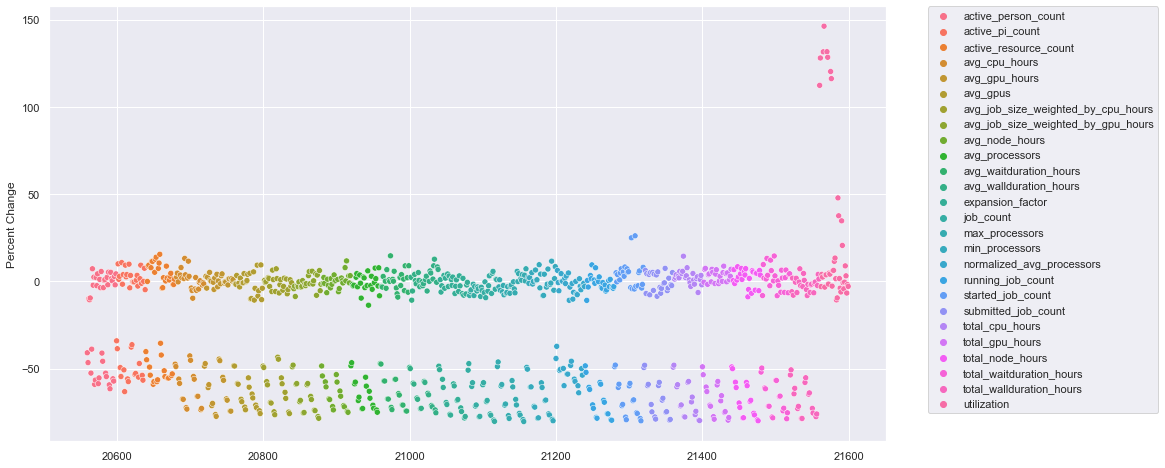

In [43]:
username_jobs_df = jobs_df.loc[df['Group By'] == 'username']
sns.scatterplot(x=username_jobs_df.index, y=username_jobs_df['Percent Change'], hue=username_jobs_df['Statistic'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

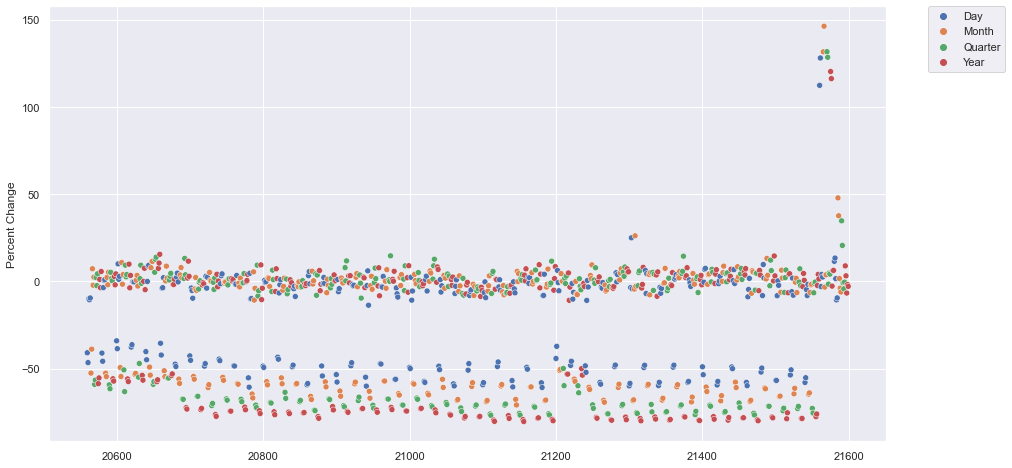

In [44]:
sns.scatterplot(x=username_jobs_df.index, y=username_jobs_df['Percent Change'], hue=username_jobs_df['Aggregation Unit'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Writing Out Dataframes To Local Files

In [22]:
df.to_csv('new_regression_timings.csv', index=False) #index=False avoids seperate column of indexes